# Week 13

## Supervised Learning Continued:
    1. Decision tree
    2. Random forest

Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading data

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
diabetes = pd.read_csv('diabetes.csv', header=0, names=col_names)

In [4]:
diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
corr = diabetes.corr()

In [7]:
corr

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


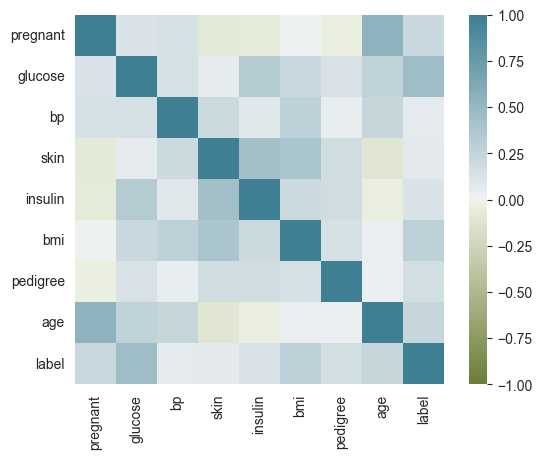

In [8]:
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(100, 220, n=200),
                 square=True)  # cmap=sns.color_palette('pastel')

Features and targets

In [9]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_cols]
y = diabetes.label

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (537, 8)
X_test: (231, 8)
y_train: (537,)
y_test: (231,)


In [12]:
clf = DecisionTreeClassifier(criterion='gini')

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Model evaluation

In [13]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


## Visualization

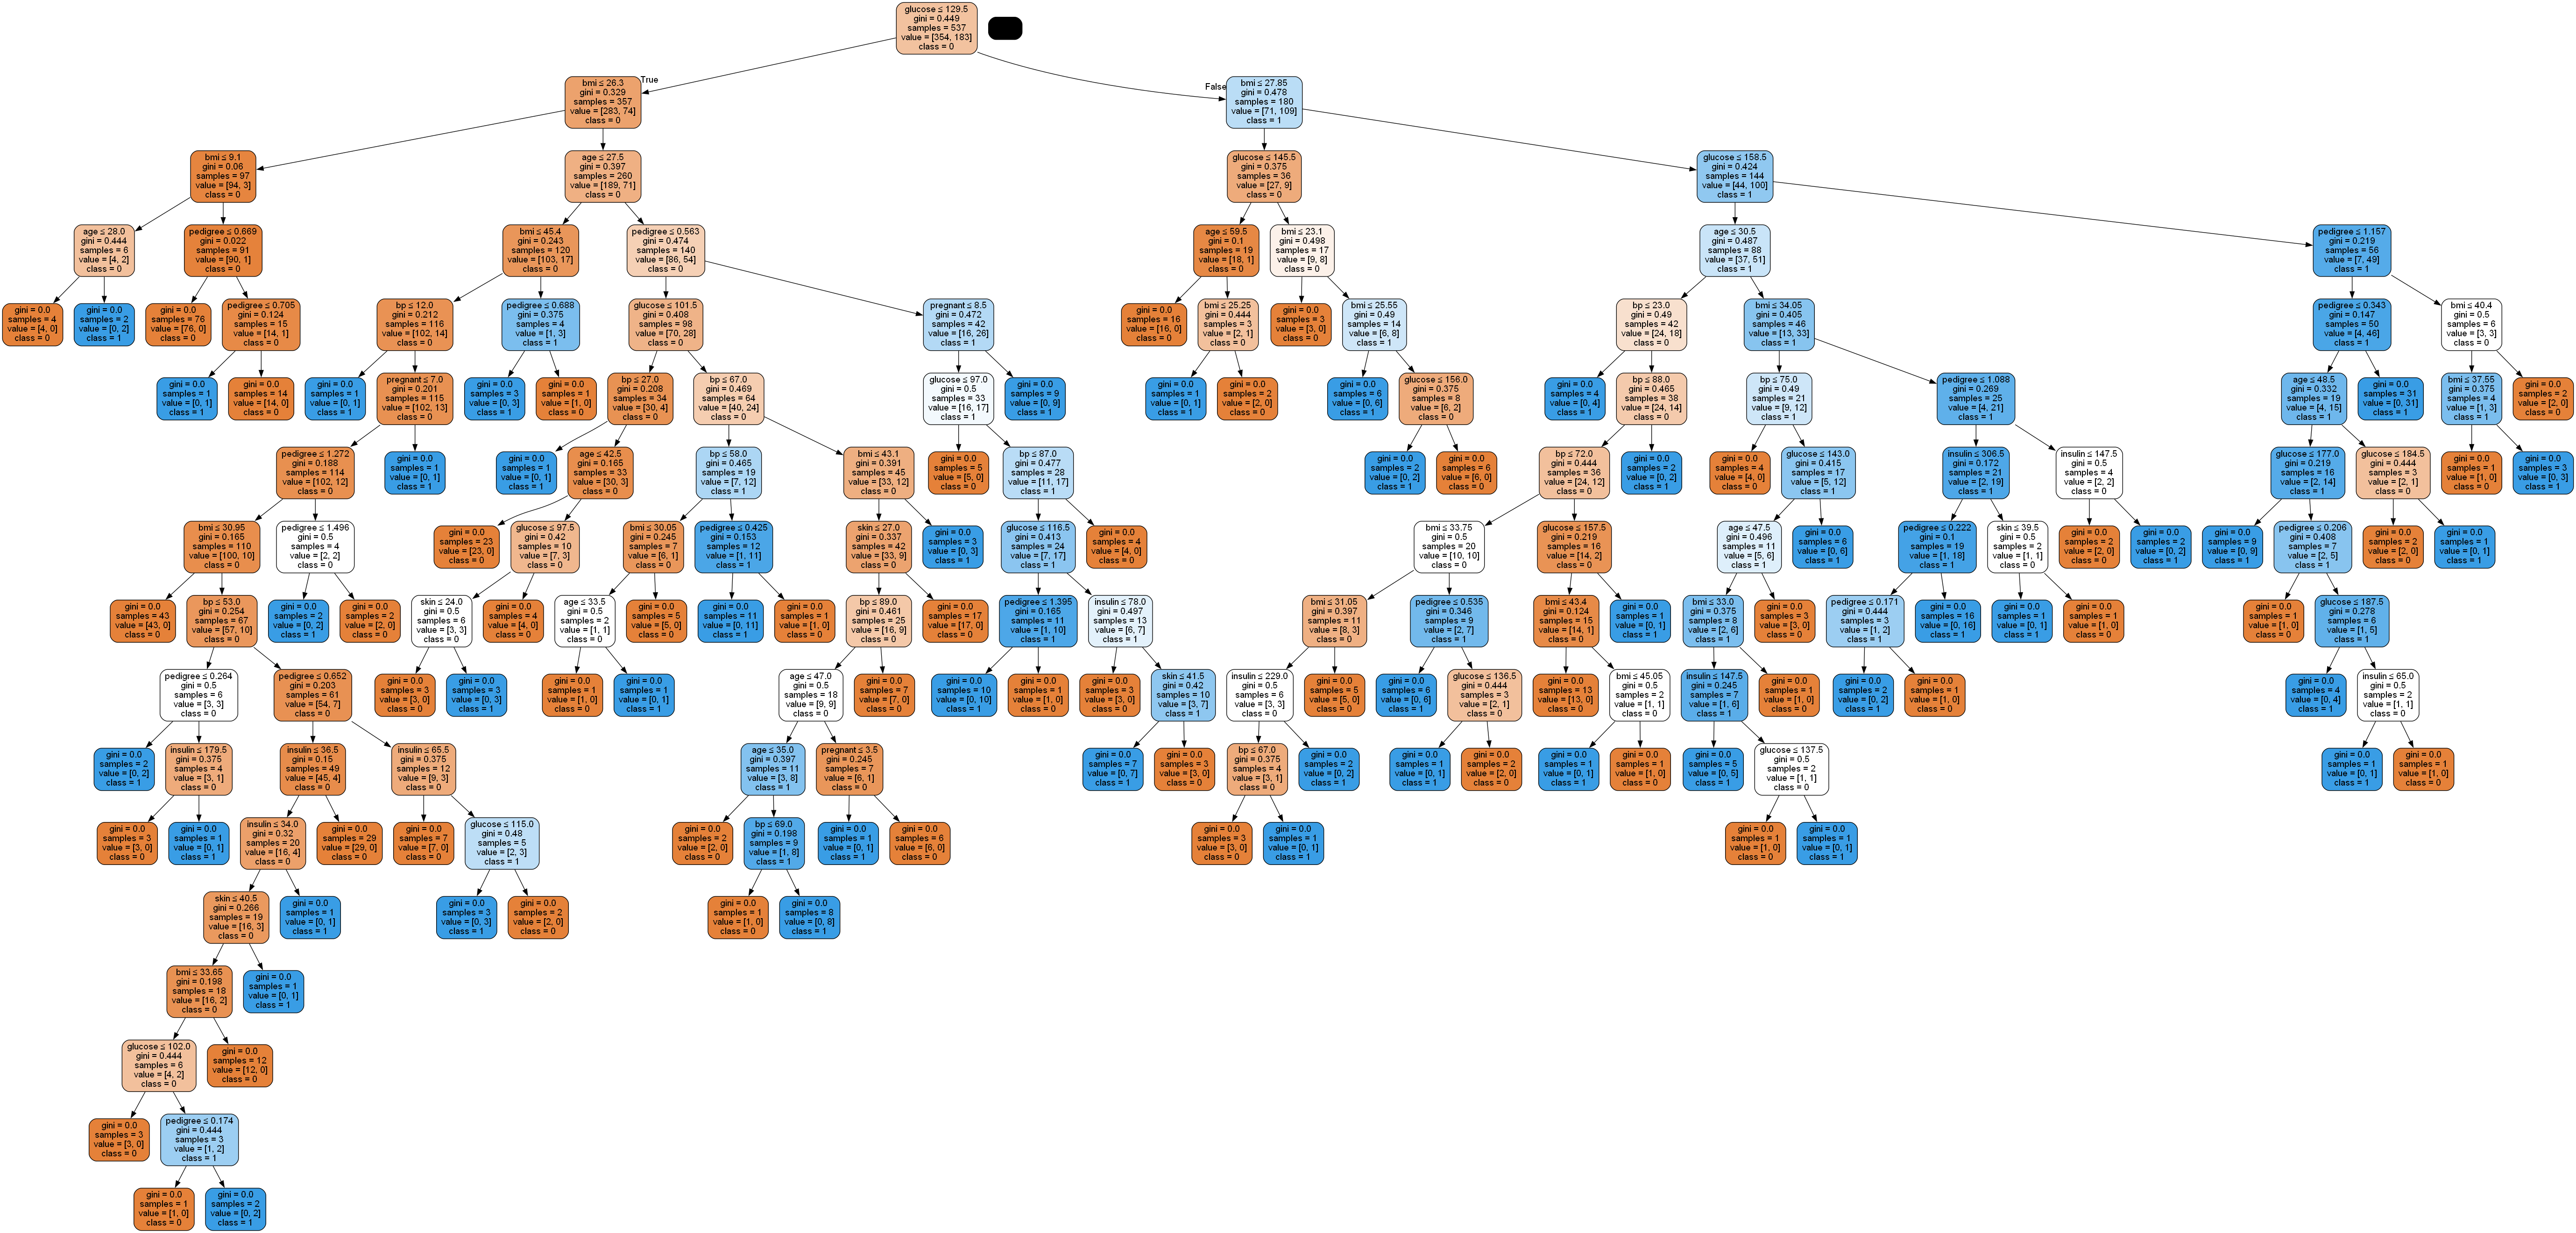

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')
Image(graph.create_png())

Another example

In [16]:
from sklearn import datasets

In [17]:
iris= datasets.load_iris()

In [18]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


use pandas and make it into dataframe 


In [21]:
data= pd.DataFrame({'sepal length': iris.data[:,0],
                   'sepal width': iris.data[:,1],
                   'petal length': iris.data[:,2],
                   'petal width': iris.data[:,3],
                   'species': iris.target
                   })

In [22]:
X = iris.data
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [24]:
iris_model = clf.fit(X_train, y_train)

In [25]:
prediction = clf.predict([[4,3,5,2]])
print(prediction)

[2]


In [26]:
clf.score(X_test, y_test)

0.9777777777777777

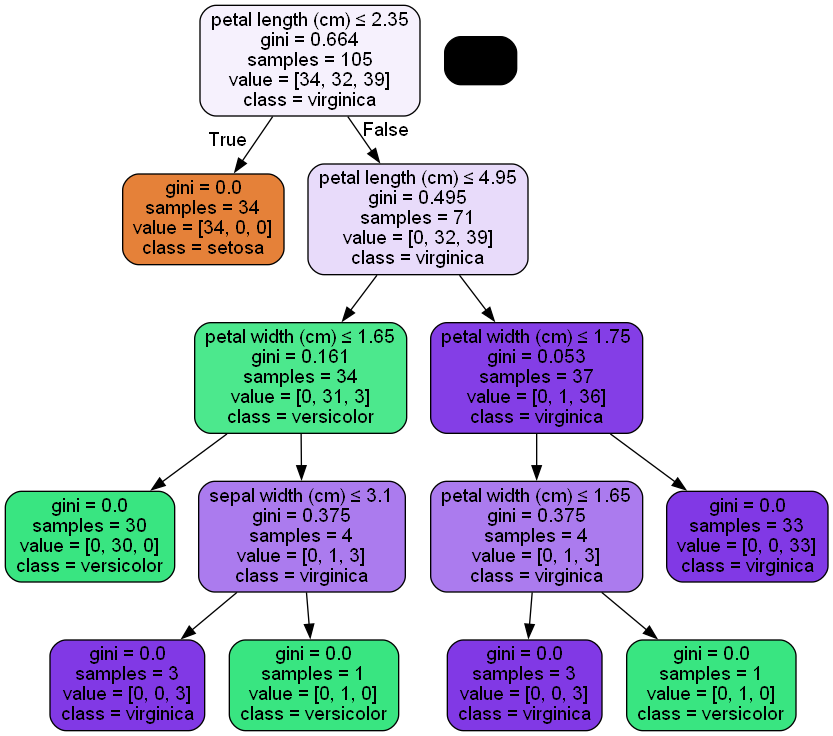

In [27]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=iris.feature_names,
                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')
Image(graph.create_png())


In [28]:
from dtreeviz.trees import dtreeviz

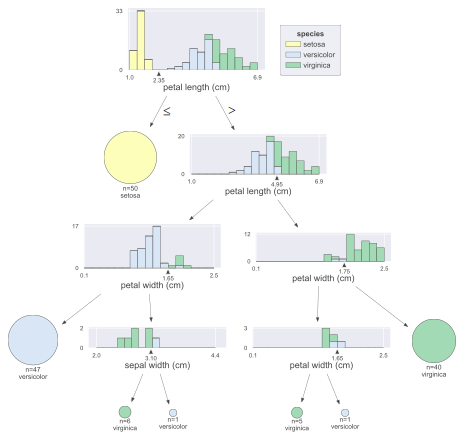

In [29]:
viz = dtreeviz(clf, iris['data'], iris['target'], target_name = 'species', 
               feature_names = np.array(iris['feature_names']), 
               class_names= {0: 'setosa', 1: 'versicolor', 2:'virginica'})
viz

## Random Forest

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [32]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


Feature importance

In [33]:
feature_imp = pd.Series(rf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.476563
petal length (cm)    0.407652
sepal length (cm)    0.095644
sepal width (cm)     0.020141
dtype: float64

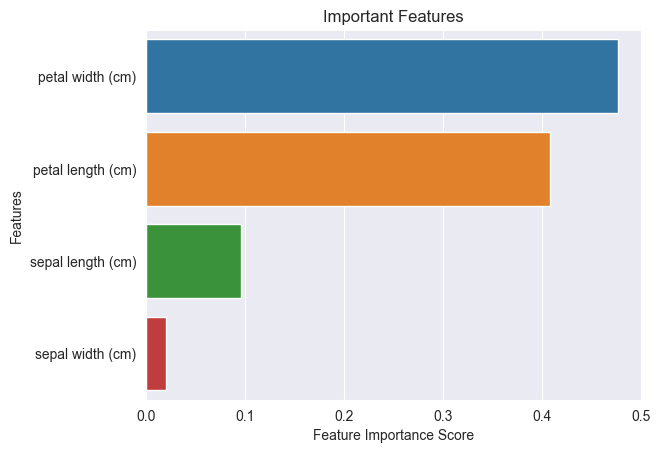

In [34]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()